In [1]:
from pathlib import Path
import os
import numpy as np
from bs4 import BeautifulSoup
import json
import pandas as pd
import tqdm

In [2]:
def parse_10K_file(file_path, company_info_only=False):
    with open(file_path, 'r', encoding='utf-8') as f:
        html_content = f.read()
    
    html_content = html_content.replace(")", ",")
    html_content = html_content.replace("(", ",")
    # remove noncanonical characters
    html_content = html_content.replace("#", ",")
    
    soup = BeautifulSoup(html_content, 'html.parser')  
    # find header
    
    company_info = soup.find('acceptance-datetime')
    
    if company_info_only:
        return {
            "company_info": company_info
        }
    
    header = soup.find('header')
    if header is None:
        return None
    real_content_obj = header.find_next_sibling(text=True)
    if real_content_obj is None:
        return None
    else:
        real_content = real_content_obj
    return {
        "company_info": company_info,
        "10K": real_content
    }

def parse_company_info(company_info_text):
    """
    An example: 
    FILER:

	COMPANY DATA:	
		COMPANY CONFORMED NAME:			ZOLTEK COMPANIES INC
		CENTRAL INDEX KEY:			0000890923
		STANDARD INDUSTRIAL CLASSIFICATION:	ELECTRICAL INDUSTRIAL APPARATUS [3620]
		IRS NUMBER:				431311101
		STATE OF INCORPORATION:			DE
		FISCAL YEAR END:			0930

	FILING VALUES:
		FORM TYPE:		10-K
		SEC ACT:		1934 Act
		SEC FILE NUMBER:	000-20600
		FILM NUMBER:		06500230

	BUSINESS ADDRESS:	
		STREET 1:		3101 MCKELVEY RD
		CITY:			ST LOUIS
		STATE:			MO
		ZIP:			63044
		BUSINESS PHONE:		3142915110

	MAIL ADDRESS:	
		STREET 1:		3101 MCKELVEY ROAD
		CITY:			ST LOUIS
		STATE:			MO
		ZIP:			63044
    """
    lines = company_info_text.split("\n")
    info = {
        "company_name": None,
        "central_index_key": None,
        "standard_industrial_classification": None,
        "irs_number": None,
    }
    for line in lines:
        line = line.strip()
        if line.startswith("COMPANY CONFORMED NAME:"):
            info["company_name"] = line.split(":")[1].strip()
        elif line.startswith("CENTRAL INDEX KEY:"):
            info["central_index_key"] = line.split(":")[1].strip()
        elif line.startswith("STANDARD INDUSTRIAL CLASSIFICATION:"):
            info["standard_industrial_classification"] = line.split(":")[1].strip()
        elif line.startswith("IRS NUMBER:"):
            info["irs_number"] = line.split(":")[1].strip()
    return info

def read_json_file(file_name):
    with open(file_name, 'r') as f:
        data = json.load(f)
    return data
    

In [8]:
raw_data_dir = Path("data")
result_dir = Path("results")
result_dir = Path("result")
result_summary_dir = Path("result_summary")
years = list(range(2006, 2024))
n_quarters = 4


In [4]:
result_summary_dir.mkdir(parents=True, exist_ok=True)

In [5]:
for year in years:
    print(f"Processing year {year}")
    year_raw_data_dir = raw_data_dir / str(year)
    year_result_dir = result_dir / str(year)
    # year_result_summary_dir = result_summary_dir / str(year)
    # year_result_summary_dir.mkdir(parents=True, exist_ok=True)
    year_summary = {}
    # for q in tqdm.range(1, n_quarters+1):
    for q in tqdm.tqdm(range(1, n_quarters+1), desc=f"Processing year {year}"):
        quarter_raw_data_dir = year_raw_data_dir / f"QTR{q}"
        quarter_result_dir = year_result_dir / f"QTR{q}"
        company_files_in_quarter = list(quarter_raw_data_dir.glob("*.txt"))    
        # quarter_summary = {}
        for company_file in tqdm.tqdm(company_files_in_quarter, desc=f"Processing QTR{q}"):
            if not ("_10-K" in company_file.name or "_10K" in company_file.name):
                continue
            tenK_info = parse_10K_file(company_file, company_info_only=True)
            company_info = parse_company_info(str(tenK_info["company_info"]))
            company_result = read_json_file(quarter_result_dir / f"{company_file.name}_word_count.json")
            company_info["year"] = year
            company_info["quarter"] = q
            company_info.update(company_result)
            year_summary[company_file.name] = company_info
    df = pd.DataFrame.from_dict(year_summary, orient='index')
    df.to_csv(result_summary_dir / f"{year}_summary.csv")
        
      
            
            
                
        

Processing year 2006


Processing year 2006:   0%|          | 0/4 [00:00<?, ?it/s]

Processing year 2006: 100%|██████████| 4/4 [00:41<00:00, 10.26s/it]


Processing year 2007


Processing year 2007: 100%|██████████| 4/4 [00:41<00:00, 10.32s/it]


Processing year 2008


Processing year 2008: 100%|██████████| 4/4 [00:40<00:00, 10.09s/it]


Processing year 2009


Processing year 2009: 100%|██████████| 4/4 [00:36<00:00,  9.24s/it]


Processing year 2010


Processing year 2010: 100%|██████████| 4/4 [00:34<00:00,  8.70s/it]


Processing year 2011


Processing year 2011: 100%|██████████| 4/4 [00:32<00:00,  8.14s/it]


Processing year 2012


Processing year 2012: 100%|██████████| 4/4 [00:32<00:00,  8.12s/it]


Processing year 2013


Processing year 2013: 100%|██████████| 4/4 [00:31<00:00,  7.89s/it]


Processing year 2014


Processing year 2014: 100%|██████████| 4/4 [00:32<00:00,  8.12s/it]


Processing year 2015


Processing year 2015: 100%|██████████| 4/4 [00:32<00:00,  8.10s/it]


Processing year 2016


Processing year 2016: 100%|██████████| 4/4 [00:31<00:00,  7.93s/it]


Processing year 2017


Processing year 2017: 100%|██████████| 4/4 [00:30<00:00,  7.52s/it]


Processing year 2018


Processing year 2018: 100%|██████████| 4/4 [00:29<00:00,  7.29s/it]


Processing year 2019


Processing year 2019: 100%|██████████| 4/4 [00:27<00:00,  6.93s/it]


Processing year 2020


Processing year 2020: 100%|██████████| 4/4 [00:27<00:00,  6.79s/it]


Processing year 2021


Processing year 2021: 100%|██████████| 4/4 [00:29<00:00,  7.45s/it]


Processing year 2022


Processing year 2022: 100%|██████████| 4/4 [00:32<00:00,  8.11s/it]


Processing year 2023


Processing year 2023: 100%|██████████| 4/4 [00:31<00:00,  7.78s/it]


In [14]:
result_summary_category_dir = Path("result_summary_category")
result_summary_category_dir.mkdir(parents=True, exist_ok=True)
catogory_json = Path("keywords/reverse_keywords_category.json")
with open(catogory_json, 'r') as f:
    catogory_dict = json.load(f)
key_words_json = Path("keywords/keywords_category.json")
with open(key_words_json, 'r') as f:
    key_words_dict = json.load(f)
all_catogories = list(key_words_dict.keys())
all_catogories.sort()
all_catogories

['Ambiguous:',
 'Compensation and Benefits',
 'Demographics and Others',
 'Diversity,Equity,and Inclusion (DEI)',
 'Employee Education:',
 'Employee Engagement:',
 'Health and Safety:',
 'Health and Safty (COVID):',
 'Labor Relations and Unions:',
 'Operations:',
 'Recruitment and Turnover:',
 'Volunteering:']

In [35]:
for year in years:
    result_summary_file = result_summary_dir / f"{year}_summary.csv"
    df = pd.read_csv(result_summary_file)
    # fill nan with 0, because some words are missing in some documents
    df = df.fillna(0)
    topic_info = {}
    for cat in all_catogories:
        topic_info[cat] = np.zeros(df.shape[0])
    for column in df.columns:
        if column not in catogory_dict:
            continue        
        category = catogory_dict[column]
        topic_info[category] = topic_info[category] + df[column].values
        
    company_info = df[["company_name", "central_index_key", "standard_industrial_classification", "irs_number", "year", "quarter"]]
    company_info = company_info.set_index("company_name")
    company_info["central_index_key"] = company_info["central_index_key"].astype(str)
    company_info["standard_industrial_classification"] = company_info["standard_industrial_classification"].astype(str)
    company_info["irs_number"] = company_info["irs_number"].astype(str)
    company_info["year"] = company_info["year"].astype(str)
    company_info["quarter"] = company_info["quarter"].astype(str)
    company_info["total_words"] = df["total_words"].values
    for cat in all_catogories:
        company_info[cat] = topic_info[cat]
    for cat in all_catogories:
        company_info[f"Freq {cat}"] = company_info[cat] / company_info["total_words"]
    company_info.to_csv(result_summary_category_dir / f"{year}_summary_category.csv")

In [45]:
overall_year_category_summary = {}
for year in years:
    result_summary_category_file = result_summary_category_dir / f"{year}_summary_category.csv"
    df = pd.read_csv(result_summary_category_file)
    # average by company
    df = df[["year"]+ [f"Freq {cat}" for cat in all_catogories]]
    df = df.groupby("year").mean()
    overall_year_category_summary[year] = df
overall_year_category_summary = pd.concat(overall_year_category_summary)
overall_year_category_summary.to_csv( f"overall_summary_category.csv")

In [46]:
import matplotlib.pyplot as plt

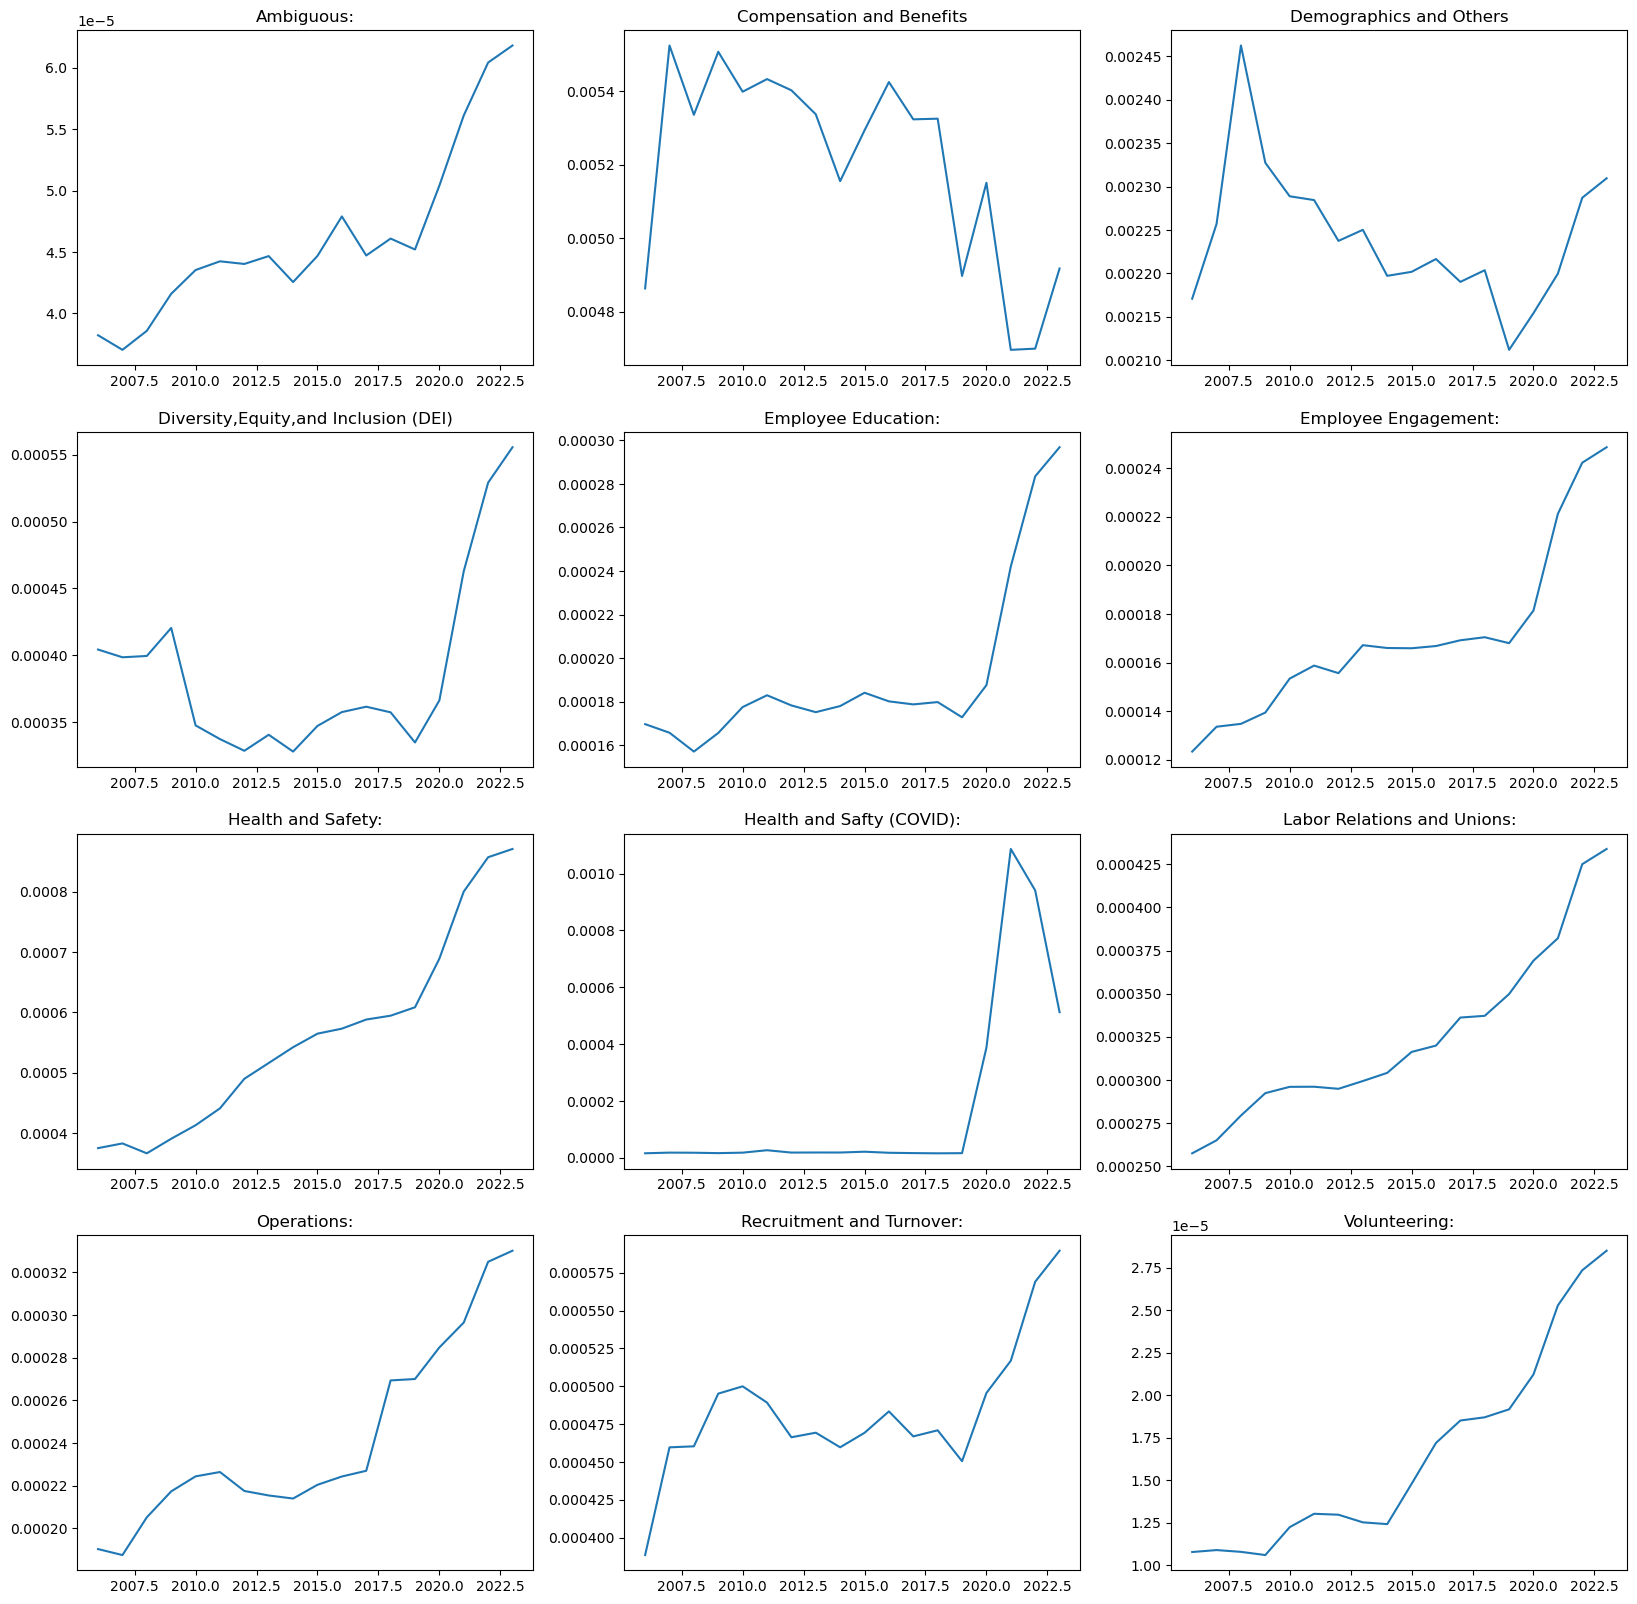

In [56]:


# plot each column of overall_year_category_summary
plt.subplots(4, 3, figsize=(20, 20))
for i, cat in enumerate(all_catogories):
    plt.subplot(4, 3, i+1)
    X = overall_year_category_summary.index.levels[0]
    Y = (overall_year_category_summary.loc[:, f"Freq {cat}"].values)
    plt.plot(X, Y, label=cat)
    plt.title(cat)
    # plt.legend()
plt.savefig("overall_summary_category.png")